### From L26 of Analytical Dynamics, University of Florida

In [1]:
import sympy as sp
from sympy import Rational, exp, oo, Matrix
import sympy.physics.mechanics as mech
mech.init_vprinting()

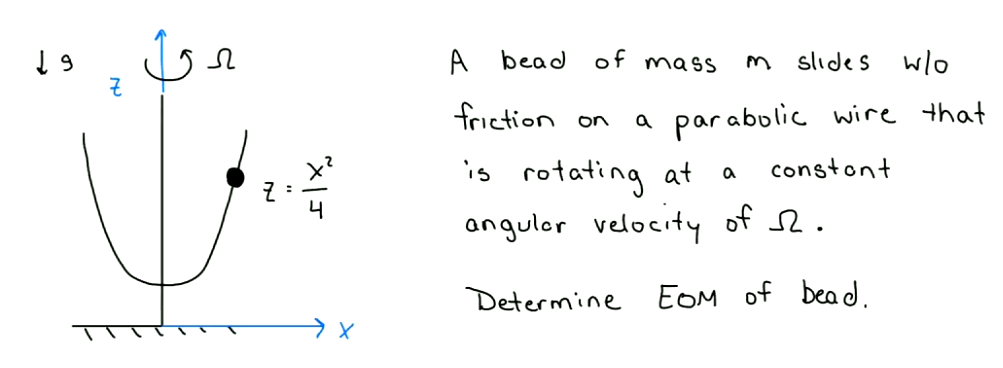

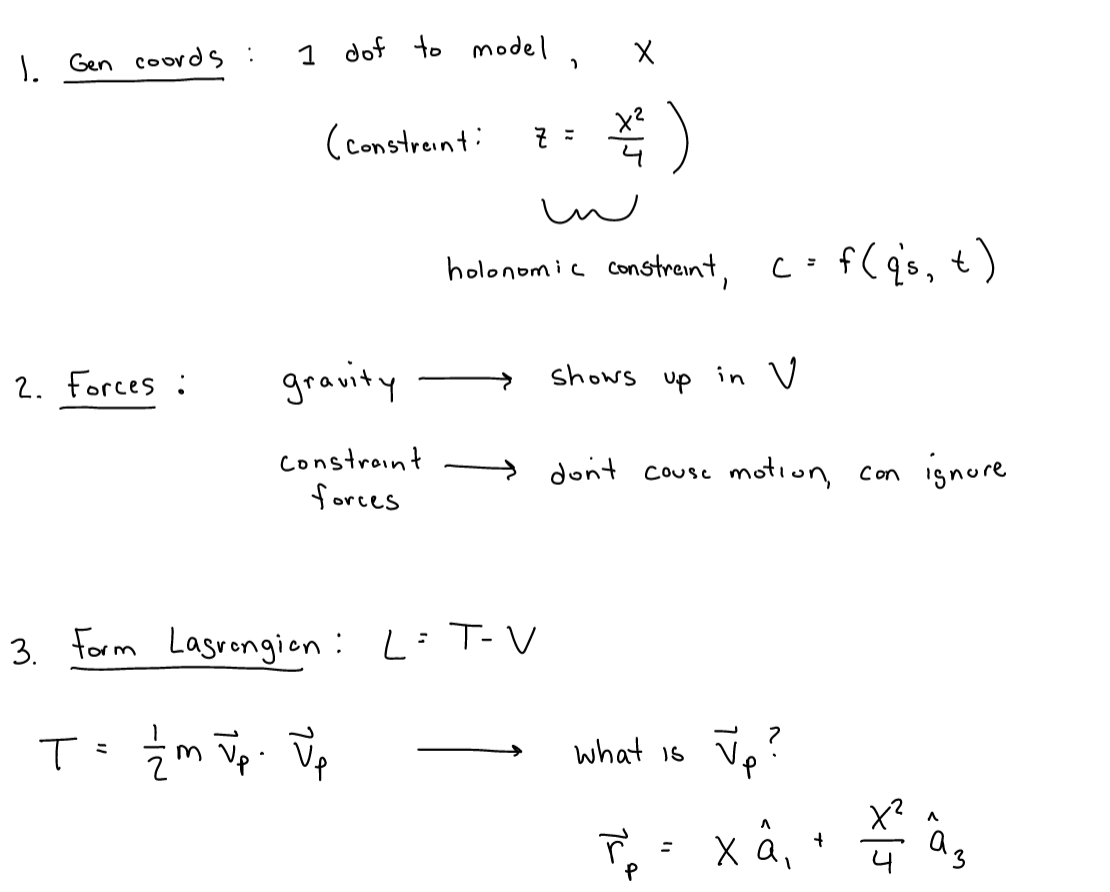

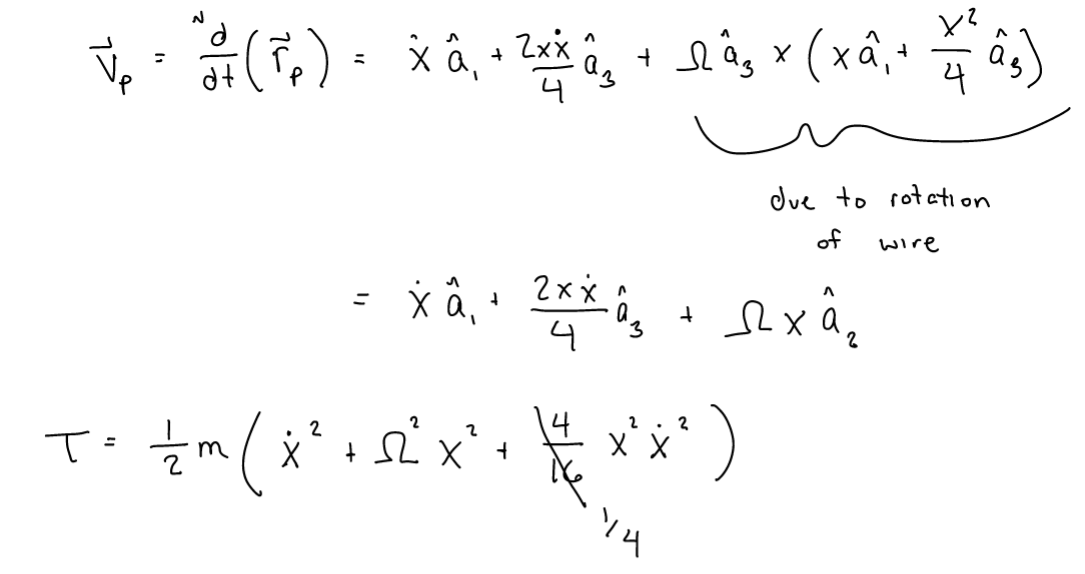

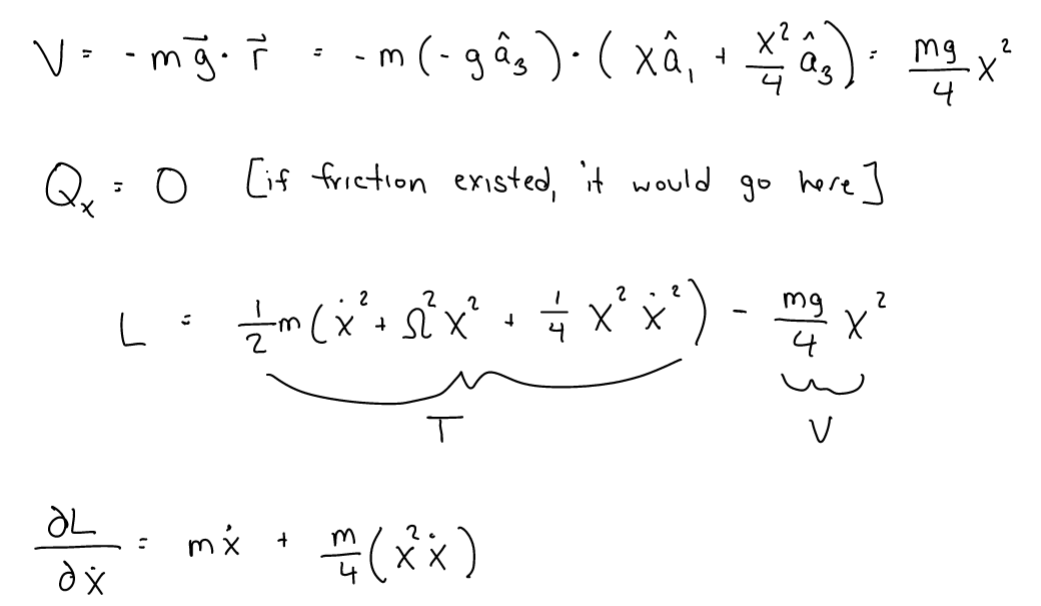

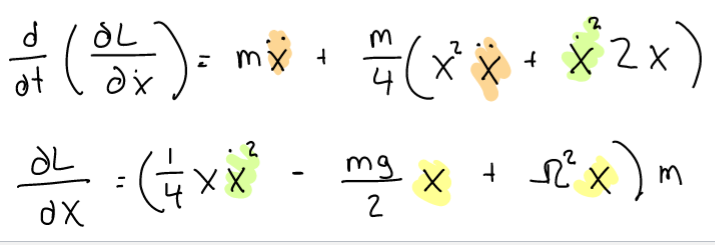

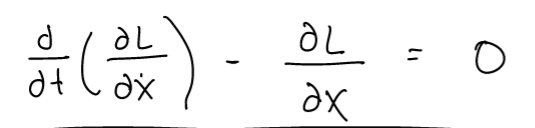

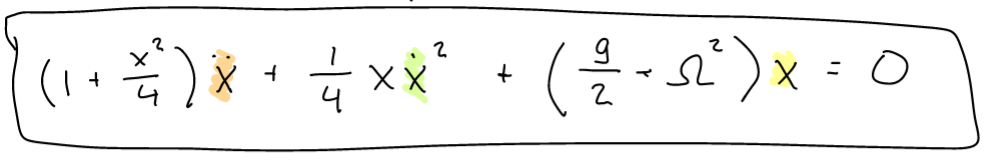

In [2]:
# Step 0: How long does it take to solve? Go!
# Step 1: How many DOF: Since ang velocity is known, just 1.
# DOF: x. So we will find our EOM for x

In [3]:
m,ang_mom,g = sp.symbols('m,Ω,g')

t = sp.symbols('t')

x = sp.Function('x')(t)
xdot = x.diff(t)
xddot = xdot.diff(t)

In [4]:
Qx = 0

T = Rational(1,2)*m*(Matrix([xdot, ang_mom*x, x*xdot/2]).dot(Matrix([xdot, ang_mom*x, x*xdot/2])))
T

In [5]:
V = m*g*x**2 / 4
V

In [6]:
L = T-V
L

In [7]:
L.diff(xdot).diff(t) + L.diff(x)

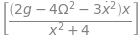

In [8]:
sp.solve(L.diff(xdot).diff(t) + L.diff(x), xddot)

## This is your solution:

In [9]:
(1+(x**2 / 4))*xddot + Rational(1,4)*x*xdot**2 + (g/2 - ang_mom**2)*x

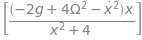

In [10]:
xddot_eq = sp.solve((1+(x**2 / 4))*xddot + Rational(1,4)*x*xdot**2 + (g/2 - ang_mom**2)*x, xddot)
xddot_eq

### Lambdify Approach (would have taken 25min)

In [11]:
xddot_f = sp.lambdify((t,m,g,ang_mom,xdot,x), xddot_eq[0])
xdot_f = sp.lambdify(xdot,xdot)

In [12]:
def dSdt(t,S):
    x, u = S

    return [ # input as y_dot, returned values are for y
    xdot_f(u),
    xddot_f(t,m,g,ang_mom,u,x)
    ]

In [13]:
# Defining constants and time:
import numpy as np

t = np.linspace(0,10,100)

m = 100. #kg
ang_mom = np.pi/2 # rad/s
g = 9.81 # m/s**2

# Intital conditions:
xo = 1.
uo = 1.
So = (xo, uo)

In [14]:
from scipy.integrate import odeint
ans = odeint(dSdt, y0=So, t=t, tfirst=True)

## Plotting the Results (for my solution):

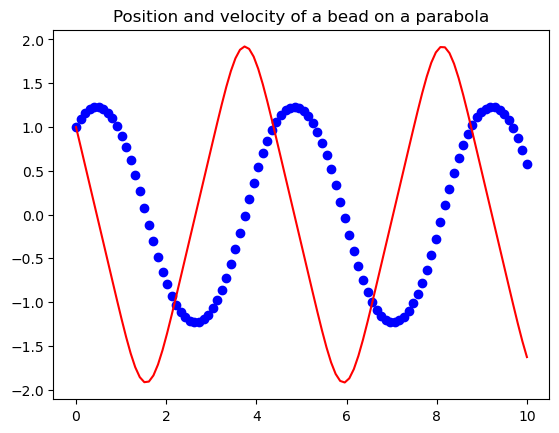

In [15]:
import matplotlib.pyplot as plt

plt.title("Position and velocity of a bead on a parabola")
plt.plot(t, ans[:,0], 'bo');
plt.plot(t, ans[:,1], 'r');